In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm


In [2]:
def plot(figsize, x, y, title = None):
    plt.figure(figsize=figsize)
    if(title):
        plt.title(title)
    plt.plot(x,y)
    plt.show()

In [3]:
def plot_mat_corrs(figsize, annot, matrix):
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
    sns.heatmap(matrix, cmap=cmap, center=0, annot=annot)
    plt.show()

In [4]:
def plot_stem_corrs(y, figsize, labels, ang_rot_lbls):
    x = [i for i in np.arange(0, len(y))]
    plt.figure(figsize=figsize)
    plt.stem(x,y, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.xticks(x, labels, rotation=ang_rot_lbls)
    plt.show()

In [5]:
def sig_corr(x1, x2, wlag, t_amostragem,x,y):
    correlations = np.zeros(wlag)
    for i in np.arange(0, wlag):
        correlations[i] = (1/(len(x1) - i))*np.dot(x1[i:],x2[:(len(x2) - i)])
    max_index = np.argmax(np.abs(correlations))
    return ([max_index*t_amostragem, np.round(correlations[max_index],2)])

In [6]:
def pcent_diff_abs(corrs1, corrs2):
    percent_diff = []
    corr_vars = []
    lag = []
    corr = []
    for  corr2, corr1 in zip(corrs2, corrs1):
        if(corr1[3]!= 0):
            percent_diff.append((np.abs((corr2[3] - corr1[3])/corr1[3])))
        else:
            percent_diff.append(np.abs(corr2[3]))
        corr_vars.append((corr2[0], corr2[1]))
        lag.append(corr2[2])
        corr.append(corr2[3])
    return [percent_diff, lag, corr, corr_vars]

In [7]:
def get_corrs_with_pairs( matrix, threshold = None):
    most_correlated_var = []
    for i in np.arange(0, len(matrix[:][:][1]), 1):
        for j in np.arange(0, len(matrix[:][:][1]), 1):
            if threshold == None:
                pair_value = (i+1, j+1, matrix[i][j][0], matrix[i][j][1])
                most_correlated_var.append(pair_value)
            elif (np.abs(matrix[i][j][1]) > threshold ):
                pair_value = (i+1, j+1, matrix[i][j][0], matrix[i][j][1])
                most_correlated_var.append(pair_value)
    return most_correlated_var   

In [8]:
def get_corr_var(matrix, vars):
    correlations = []
    for var in vars:
        correlations.append(matrix[int(var[0])][int(var[1])][1])
    return correlations    

In [9]:
def normalize_dfs(dfs):
    all_dfs = pd.concat(dfs)
    norm_dfs = []
   
    all_dfs_norm =  (all_dfs - all_dfs.mean())/all_dfs.std()
    all_dfs_norm['tout'] = all_dfs['tout']
    
    num_linhas = int(len(all_dfs)/len(dfs))
    num_blocks = int(len(all_dfs)/len(dfs[0]))
    
    for i in np.arange(0, num_blocks):
        df = all_dfs_norm.iloc[(i*num_linhas) : (i*num_linhas + num_linhas),:]
        norm_dfs.append(df)
    return norm_dfs
        

In [10]:
def get_dfs(init, end):
    #/home/rute/Pesquisa/data_dezembro
    #/home/notebook-lab/Downloads/dbv3
    dfs = []
    for i in np.arange(init,end + 1):
        dfs.append(pd.read_csv('/home/rute/Pesquisa/data_dezembro/simout_' + str(i) + '.csv'))
    return dfs

In [11]:
def mean_correlation(wlag, dfs = []):
    matrix_corr_list = []
    m_sum_complete = np.zeros([22 , 22, 4])
    dfs_norm = normalize_dfs(dfs)
    
    for df in dfs_norm:
        tam_m = int(len(df.columns[1:23]))
        m_corr = np.zeros((tam_m,tam_m,4))
        for i, x in enumerate(df.columns[1:23]):
            for j, y in enumerate(df.columns[1:23]):
                corr = sig_corr(np.array(df[x]), np.array(df[y]),wlag, 0.01, x, y)
                corr.extend([0,0])
                m_corr[i][j] = corr
        matrix_corr_list.append(m_corr)
    
    for m in matrix_corr_list:
        m[:,:,1] = m[:,:,1]/np.diagonal(m[:,:,1])

    m_mean = np.round(np.mean(matrix_corr_list, axis =0),2)
    m_std = np.std(matrix_corr_list, axis=0)

    for i in np.arange(0, len(m_mean)):
        for j in np.arange(0, len(m_mean)):
            m_mean[i][j][2] = m_std[i][j][0]
            m_mean[i][j][3] = m_std[i][j][1]
    return m_mean

In [12]:
regular_sims = get_dfs(1,10)
disturb_1_sims = get_dfs(11,14)
disturb_2_sims = get_dfs(15,18)
#disturb_3_sims = get_dfs(19,22)
disturb_4_sims = get_dfs(23,26)
disturb_5_sims = get_dfs(27,30)
disturb_6_sims = get_dfs(31,34)

dists = [disturb_1_sims, disturb_2_sims,disturb_4_sims, disturb_5_sims, disturb_6_sims]

In [13]:
wlag = int(2/0.01)
corrs_reg_sims = mean_correlation(wlag, regular_sims)
corrs_no_dist_with_pairs = get_corrs_with_pairs(corrs_reg_sims)

In [14]:
corrs_pairs_dists = []
corrs_by_dist = []
corrs_pairs = []

for dist in dists:
    corrs_by_dnvl = []
    cor_pair_by_dnvl = []
    for d_nvl in dist:
        mean_corr = mean_correlation(wlag, [d_nvl])
        corrs_by_dnvl.append(mean_corr)
        cor_pair_by_dnvl.append(get_corrs_with_pairs(mean_corr))
    corrs_by_dist.append(corrs_by_dnvl)
    corrs_pairs_dists.append(cor_pair_by_dnvl)   

In [15]:
pcnt_diff_dist = []

for c_pair_dist in corrs_pairs_dists:
    pcnt_by_dnvl =[]
    for dnvl_pair in c_pair_dist:
        diff_percent = pcent_diff_abs(corrs_no_dist_with_pairs, dnvl_pair)
        p = pd.DataFrame({'diff_perc': diff_percent[0], 'lag' : diff_percent[1], 'corr': diff_percent[2]}, index=diff_percent[3])
        p.sort_values(by = 'diff_perc', inplace=True, ascending=False)
        pcnt_by_dnvl.append(p)
    pcnt_diff_dist.append(pcnt_by_dnvl)           

In [16]:
ten_pcnt_dist = []

for dist_pcnt in pcnt_diff_dist:
    ten_pcnt_nvl = []
    for dpcnt_nvl in dist_pcnt:
        ten_most = dpcnt_nvl['diff_perc'][:int(0.1*len(dpcnt_nvl))].index
        ten_pcnt_nvl.append(dpcnt_nvl.loc[ten_most])
    ten_pcnt_dist.append(ten_pcnt_nvl)       

for dist_pcnt in ten_pcnt_dist:
    index = pd.concat(dist_pcnt, join='inner', axis=1).index
    for i, dist_nvl in enumerate(dist_pcnt):
        dist_pcnt[i] = dist_nvl.loc[index]


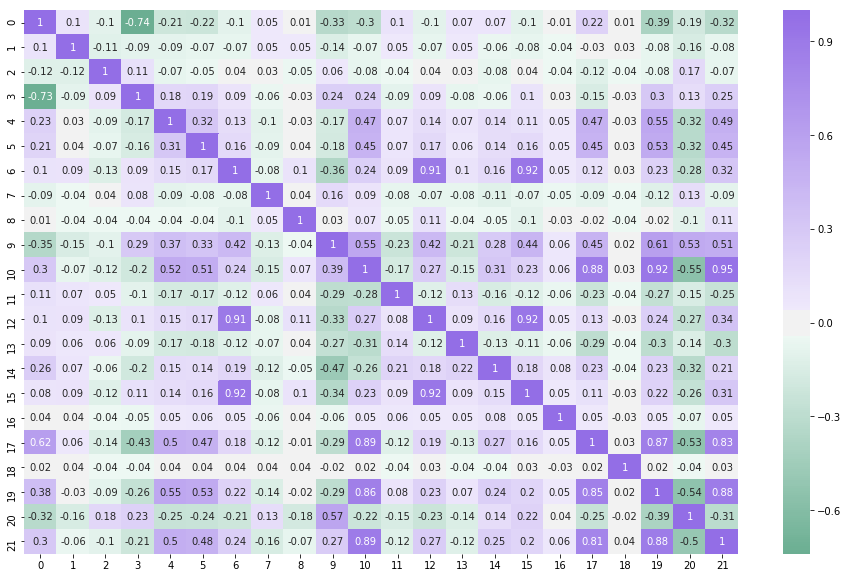

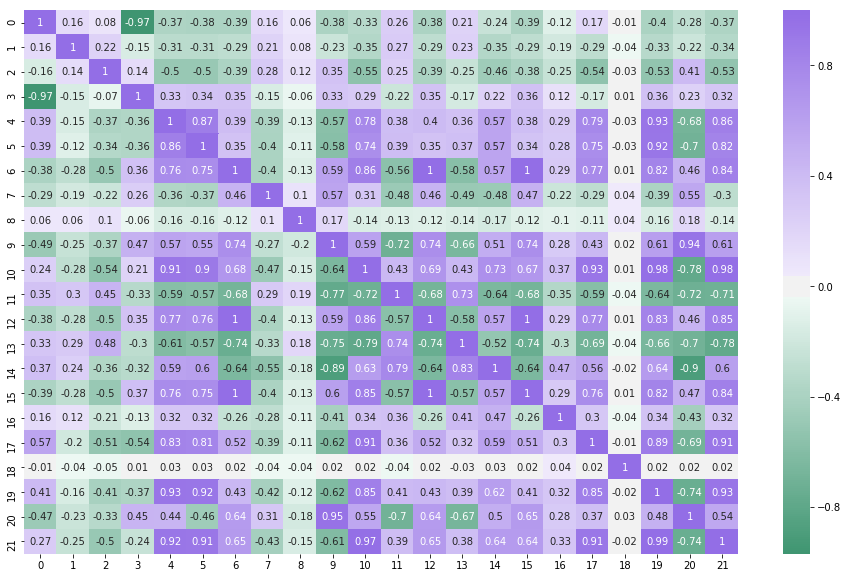

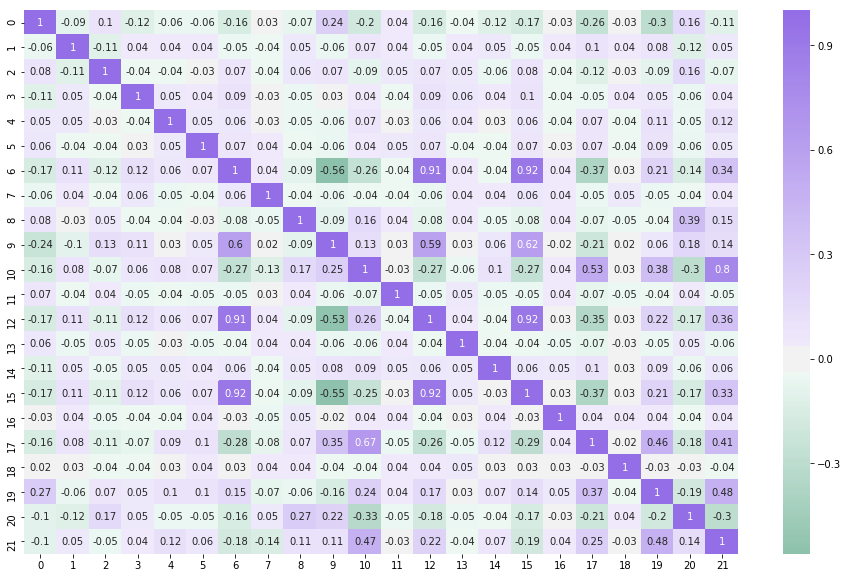

In [17]:
plot_mat_corrs(figsize = (16,10), annot=True, matrix = corrs_by_dist[0][0][:,:,1] )
plot_mat_corrs(figsize = (16,10), annot=True, matrix = corrs_by_dist[0][3][:,:,1] )
plot_mat_corrs(figsize = (16,10), annot=True, matrix = corrs_by_dist[2][3][:,:,1] )

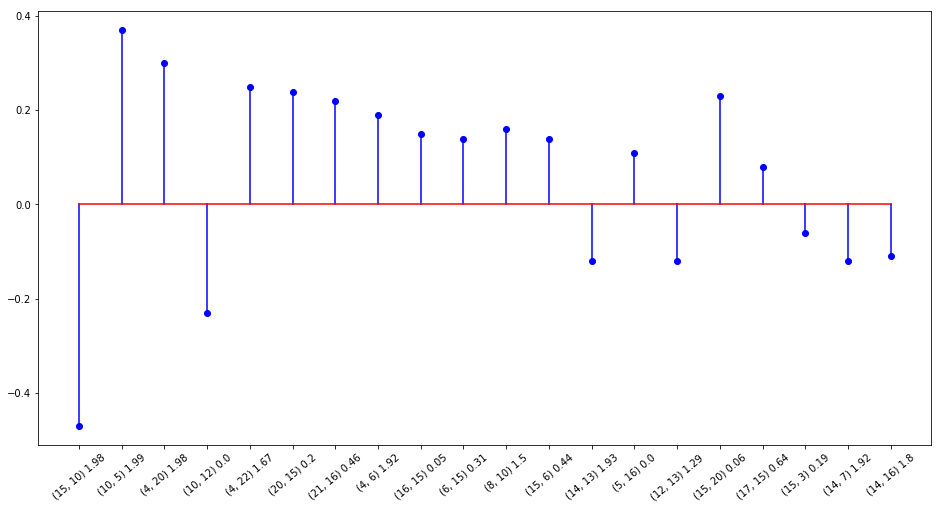

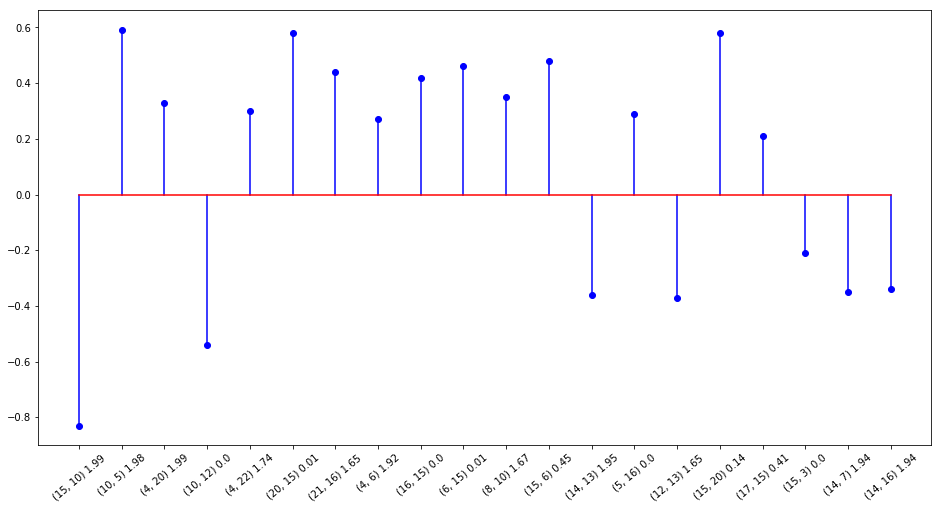

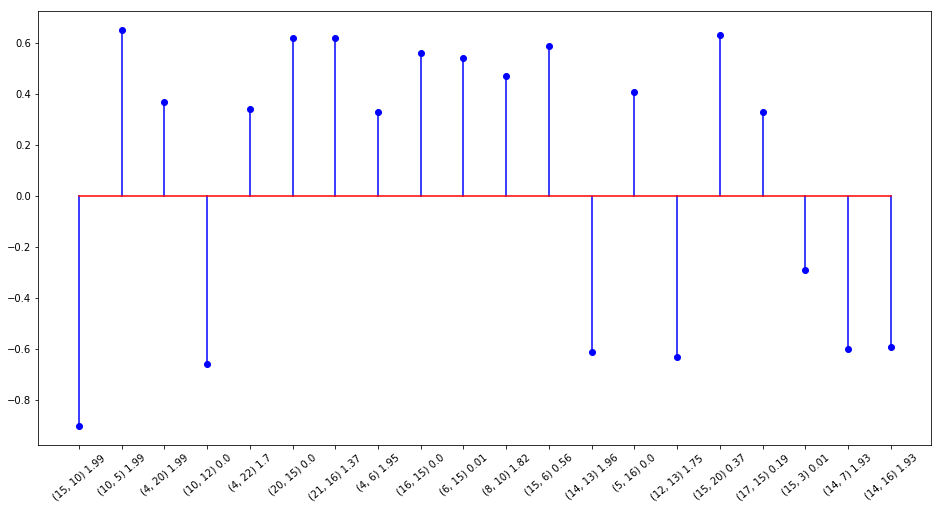

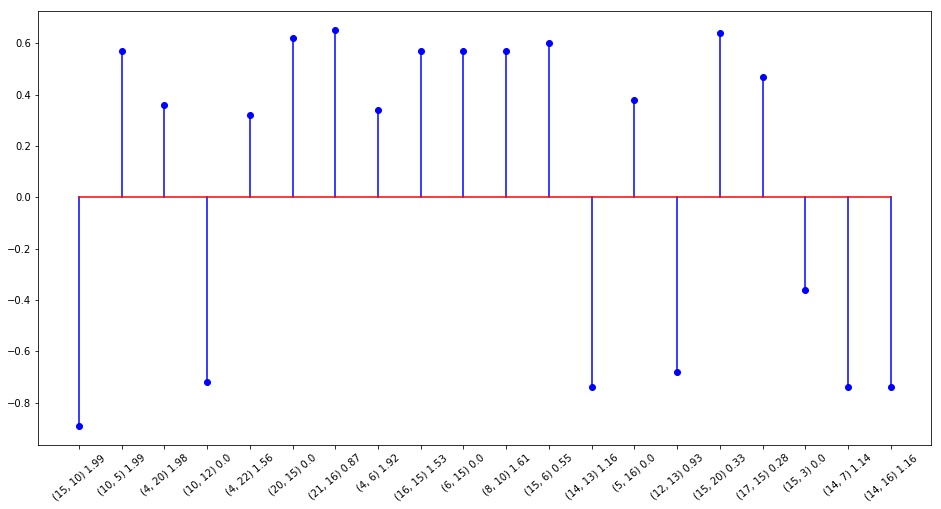

In [18]:
l  = [str(i) + ' ' + str(lag)  for i, lag in zip(ten_pcnt_dist[0][0].index, ten_pcnt_dist[0][0]['lag'])]
plot_stem_corrs(ten_pcnt_dist[0][0]['corr'], (16,8), l, 40)

l  = [str(i) + ' ' + str(lag)  for i, lag in zip(ten_pcnt_dist[0][0].index, ten_pcnt_dist[0][1]['lag'])]
plot_stem_corrs(ten_pcnt_dist[0][1]['corr'], (16,8), l, 40)

l  = [str(i) + ' ' + str(lag)  for i, lag in zip(ten_pcnt_dist[0][0].index, ten_pcnt_dist[0][2]['lag'])]
plot_stem_corrs(ten_pcnt_dist[0][2]['corr'], (16,8),l, 40)

l  = [str(i) + ' ' + str(lag)  for i, lag in zip(ten_pcnt_dist[0][0].index, ten_pcnt_dist[0][3]['lag'])]
plot_stem_corrs(ten_pcnt_dist[0][3]['corr'], (16,8), l, 40)

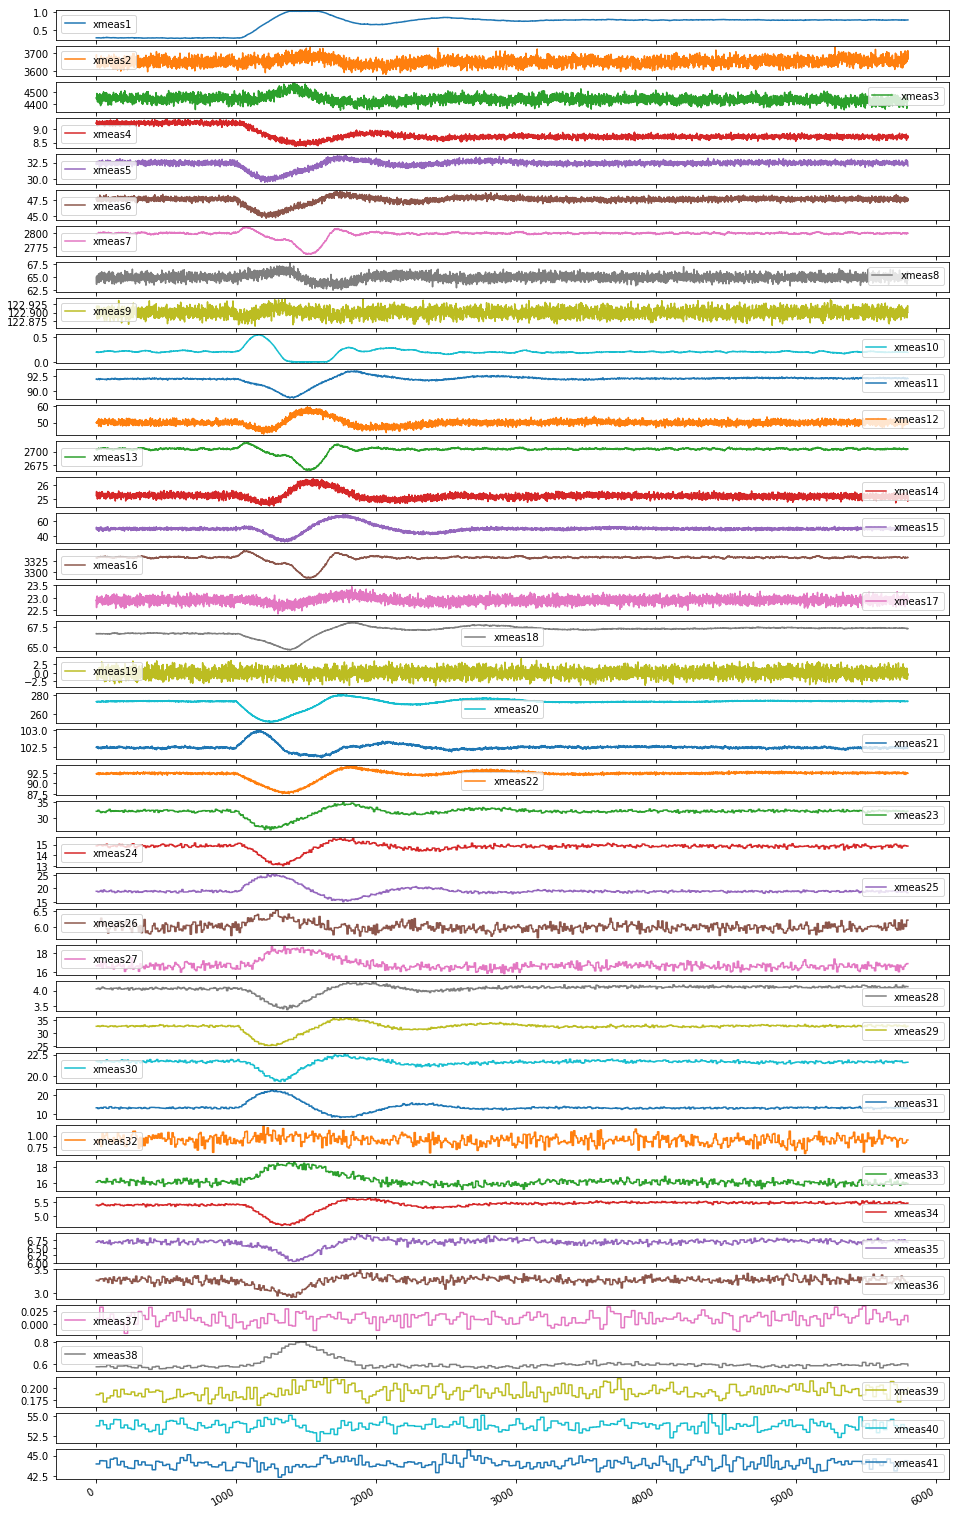

In [19]:
disturb_1_sims[3][disturb_1_sims[3].columns[1:]].plot(figsize=(16,30), subplots=True)
plt.show()